In [6]:
#Module importieren
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns; sns.set()  
import scipy.cluster.hierarchy as shc  
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering 

In [7]:
#Daten einlesen
data = pd.read_csv("marketing_campaign.csv", sep="\t")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


#### Daten vorverarbeiten

In [8]:
# Löschen aller nan-Werte
data_nan = data[data.isna().any(axis=1)]
data_df = data[~data.isna().any(axis=1)]

# Aufteilung Marital_Status zu Single oder Together
data_df['Marital_Status'] = data_df['Marital_Status'].isin(['Together', 'Married'])
data_df.loc[data_df['Marital_Status'] == True, 'Marital_Status'] = 'Together'
data_df.loc[data_df['Marital_Status'] == False, 'Marital_Status'] = 'Single'
data_df['Marital_Status'] = data_df['Marital_Status'].isin(['Together', 'Married'])
data_df.loc[data_df['Marital_Status'] == True, 'Marital_Status'] = 2 #Together
data_df.loc[data_df['Marital_Status'] == False, 'Marital_Status'] = 1 #Singel

# Education in Zahlen umwandeln 
data_df.loc[data_df['Education'] == 'Graduation', 'Education'] = 1
data_df.loc[data_df['Education'] == 'PhD', 'Education'] = 2
data_df.loc[data_df['Education'] == 'Master', 'Education'] = 3
data_df.loc[data_df['Education'] == 'Basic', 'Education'] = 4
data_df.loc[data_df['Education'] == '2n Cycle', 'Education'] = 5

# unrelevante Spalten löschen
data_df = data_df.drop(['Dt_Customer'], axis=1)
data_df = data_df.drop(['AcceptedCmp3'], axis=1)
data_df = data_df.drop(['AcceptedCmp1'], axis=1)
data_df = data_df.drop(['AcceptedCmp2'], axis=1)
data_df = data_df.drop(['AcceptedCmp4'], axis=1)
data_df = data_df.drop(['AcceptedCmp5'], axis=1)
data_df = data_df.drop(['Complain'], axis=1)
data_df = data_df.drop(['Z_CostContact'], axis=1)
data_df = data_df.drop(['Z_Revenue'], axis=1)
data_df = data_df.drop(['Response'], axis=1)
data_df = data_df.drop(['Recency'], axis=1)

# Spalte Menge hinzufügen
data_df['Menge']=data_df['MntWines']+data_df['MntFruits']+data_df['MntMeatProducts']+data_df['MntFishProducts']+data_df['MntSweetProducts']+data_df['MntGoldProds']

data_df

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Menge
0,5524,1957,1,1,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,1617
1,2174,1954,1,1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,27
2,4141,1965,1,2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,776
3,6182,1984,1,2,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,53
4,5324,1981,2,2,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,1,2,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,1341
2236,4001,1946,2,2,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,444
2237,7270,1981,1,1,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,1241
2238,8235,1956,3,2,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,843


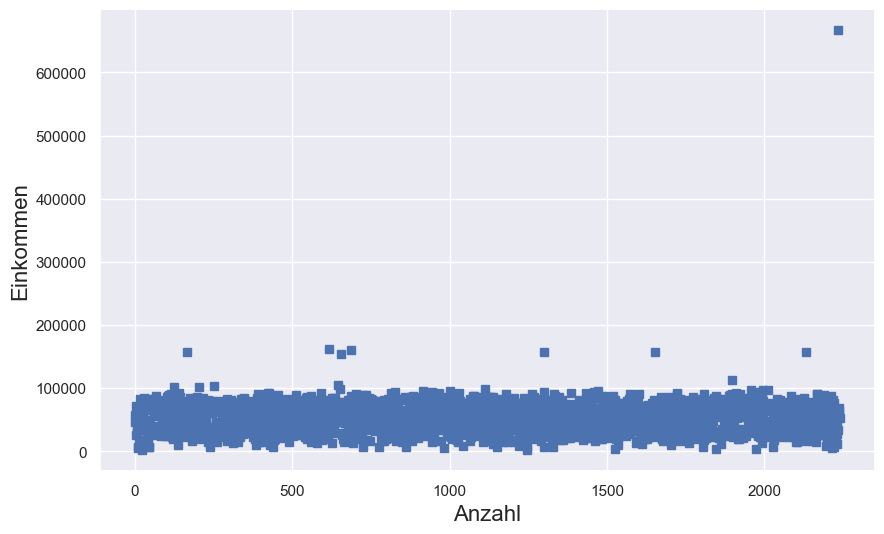

In [9]:
# Ausreißer in der Einkommensverteilung
Income= data['Income']
plt.figure(figsize=(10,6))
plt.plot(Income, 'bs')
plt.ylabel('Einkommen',size=16)
plt.xlabel('Anzahl',size=16)
plt.show()

In [10]:
# Ausreißer eliminieren
data_df=data_df.sort_values('Income',ascending=True)
df1=data_df.iloc[:-1]
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Menge
1245,6862,1971,1,1,1730.0,0,0,1,1,3,1,1,1,15,0,0,0,20,8
21,5376,1979,1,2,2447.0,1,0,1,1,1725,1,1,1,15,0,28,0,1,1730
1524,11110,1973,1,1,3502.0,1,0,2,1,1,0,0,1,0,0,0,0,14,5
1846,9931,1963,2,2,4023.0,1,1,5,0,1,1,1,1,15,0,0,0,19,9
1975,10311,1969,1,2,4428.0,0,1,16,4,12,2,4,321,0,25,0,0,1,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,4931,1977,1,2,157146.0,0,0,1,0,1725,2,1,1,0,0,28,0,1,1730
164,8475,1973,2,2,157243.0,0,1,20,2,1582,1,2,1,15,0,22,0,0,1608
1300,5336,1971,3,2,157733.0,1,0,39,1,9,2,0,8,0,1,0,1,1,59
687,1501,1982,2,2,160803.0,0,0,55,16,1622,17,3,4,15,0,28,1,0,1717


#### Daten und Kunden kennenlernen

In [11]:
# Korrelationsmatrix
corr=data[['Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.162000,0.230000,-0.352000,-0.020000,-0.158000,-0.018000,-0.031000,-0.042000,-0.018000,-0.062000,-0.061000,-0.145000,-0.121000,-0.128000,0.121000
Income,-0.162000,1.000000,-0.429000,0.019000,-0.004000,0.579000,0.431000,0.585000,0.439000,0.441000,0.326000,-0.083000,0.388000,0.589000,0.529000,-0.553000
Kidhome,0.230000,-0.429000,1.000000,-0.036000,0.009000,-0.496000,-0.373000,-0.437000,-0.388000,-0.371000,-0.350000,0.222000,-0.362000,-0.502000,-0.500000,0.448000
Teenhome,-0.352000,0.019000,-0.036000,1.000000,0.016000,0.005000,-0.177000,-0.261000,-0.204000,-0.162000,-0.022000,0.388000,0.155000,-0.111000,0.051000,0.135000
Recency,-0.020000,-0.004000,0.009000,0.016000,1.000000,0.016000,-0.004000,0.023000,0.001000,0.023000,0.017000,-0.001000,-0.011000,0.025000,0.001000,-0.021000
MntWines,-0.158000,0.579000,-0.496000,0.005000,0.016000,1.000000,0.390000,0.563000,0.400000,0.387000,0.388000,0.011000,0.542000,0.635000,0.642000,-0.321000
MntFruits,-0.018000,0.431000,-0.373000,-0.177000,-0.004000,0.390000,1.000000,0.543000,0.595000,0.567000,0.393000,-0.132000,0.297000,0.488000,0.462000,-0.418000
MntMeatProducts,-0.031000,0.585000,-0.437000,-0.261000,0.023000,0.563000,0.543000,1.000000,0.568000,0.524000,0.351000,-0.122000,0.294000,0.724000,0.480000,-0.539000
MntFishProducts,-0.042000,0.439000,-0.388000,-0.204000,0.001000,0.400000,0.595000,0.568000,1.000000,0.580000,0.423000,-0.139000,0.294000,0.534000,0.460000,-0.446000
MntSweetProducts,-0.018000,0.441000,-0.371000,-0.162000,0.023000,0.387000,0.567000,0.524000,0.580000,1.000000,0.370000,-0.120000,0.349000,0.491000,0.449000,-0.423000


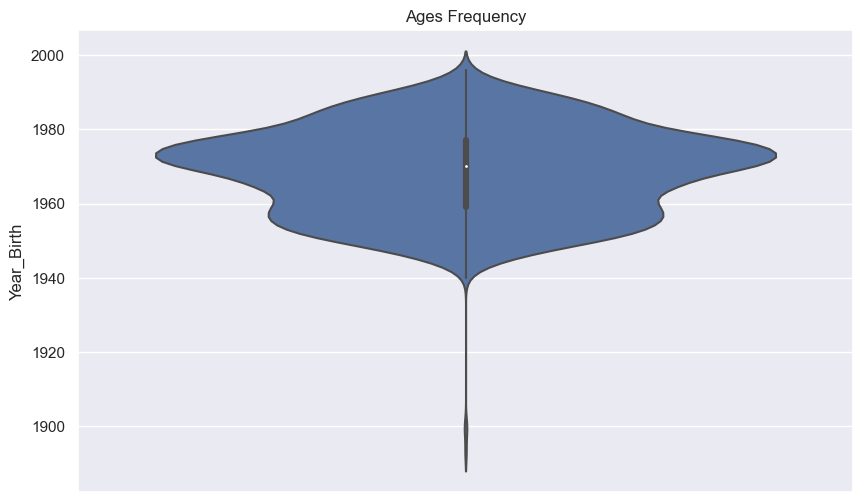

In [12]:
# Altersverteilung der Kunden
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["Year_Birth"])
plt.show()

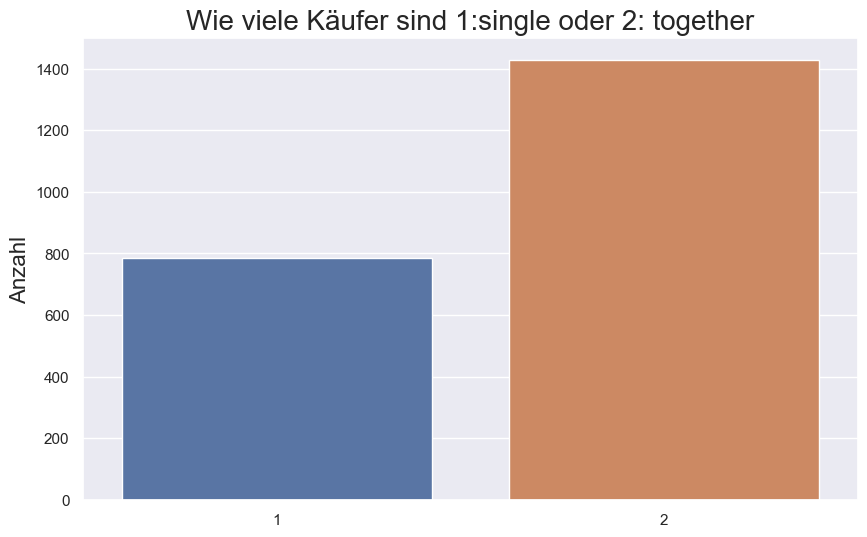

In [13]:
# Beziehungsstatus der Kunden
married = df1.Marital_Status.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.barplot(x=married.index, y=married.values)
plt.title('Wie viele Käufer sind 1:single oder 2: together', size=20)
plt.ylabel('Anzahl',size='16')
plt.show()
#1 single und #2 together

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


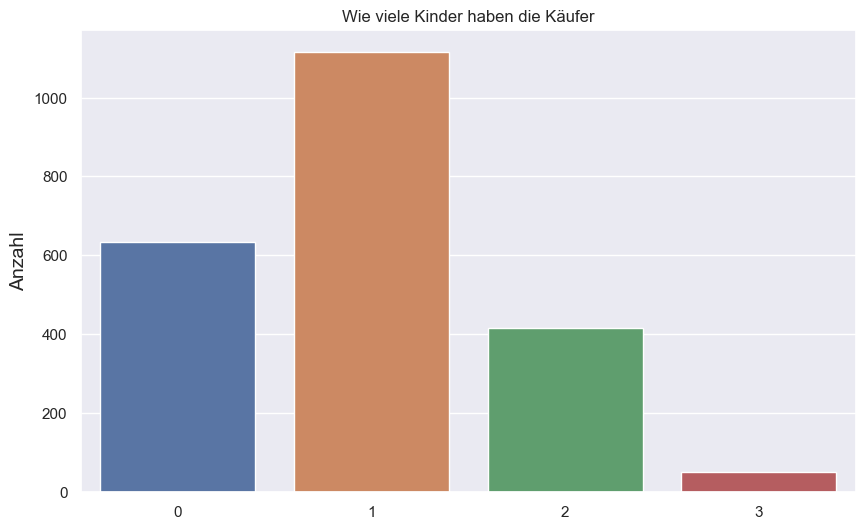

In [14]:
# Anzahl Kinder der Kunden
kids=df1[['Kidhome','Teenhome']]
kids1 = kids['Kidhome']
kids2 = kids['Teenhome']
kids['children']=kids1+kids2
df1['children']= df1['Kidhome']+df1['Teenhome']

kidsgraph = kids.children.value_counts()
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.barplot(x=kidsgraph.index, y=kidsgraph.values)
plt.title('Wie viele Kinder haben die Käufer')
plt.ylabel('Anzahl',size=14)
plt.show()

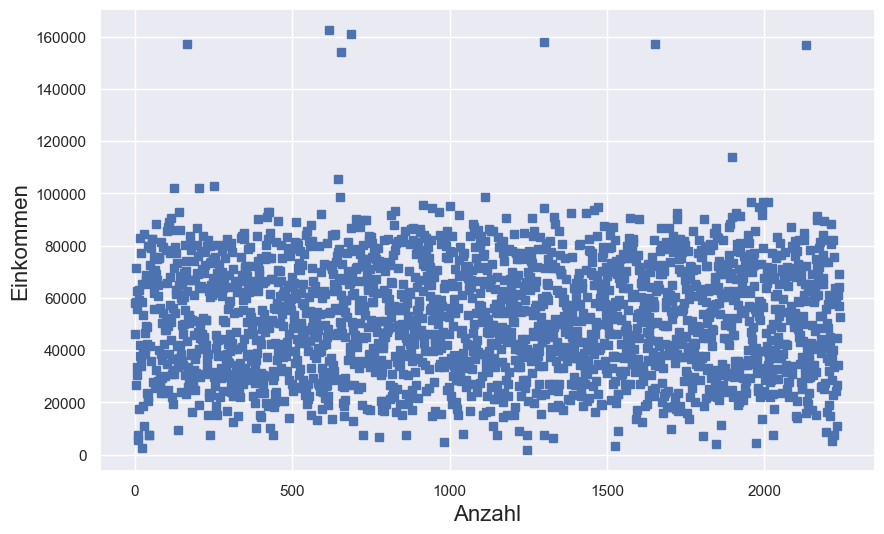

In [15]:
# Einkommensverteilung der Kunden anzeigen
Income= df1['Income']
plt.figure(figsize=(10,6))
plt.plot(Income, 'bs')
plt.ylabel('Einkommen',size=16)
plt.xlabel('Anzahl',size=16)
plt.show()

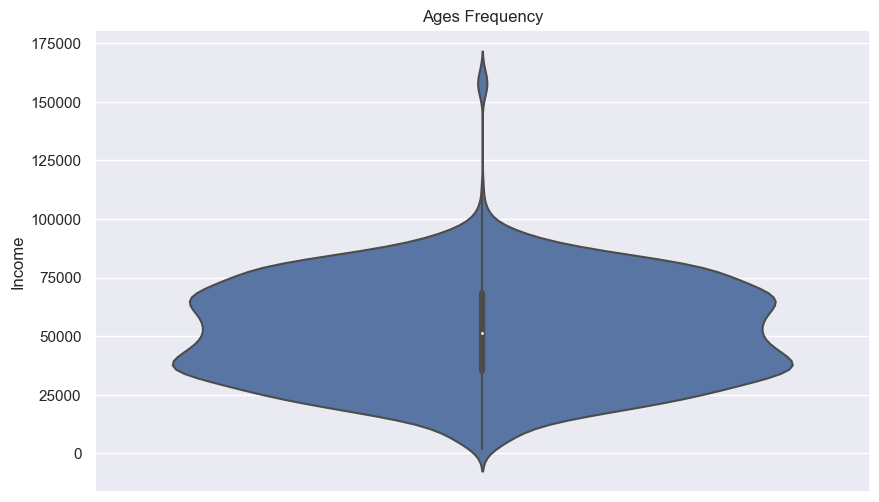

In [16]:
# Einkommensverteilung 
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df1["Income"])
plt.show()

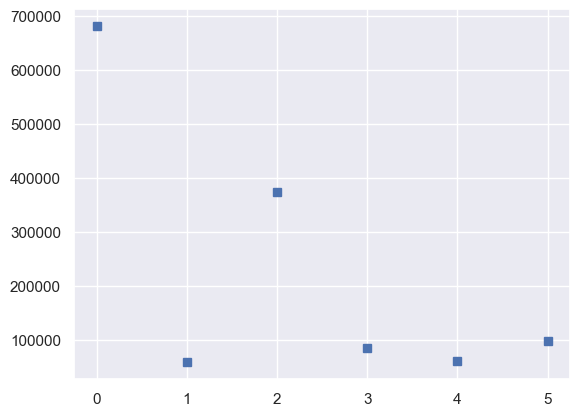

In [17]:
# Konsummenge 
Wein = data.MntWines.sum()
Frucht = data.MntFruits.sum()
Fleisch = data.MntMeatProducts.sum()
Fisch=data.MntFishProducts.sum()
Süßes=data.MntSweetProducts.sum()
Gold=data.MntGoldProds.sum()

x=[Wein,Frucht,Fleisch,Fisch,Süßes,Gold]
plt.plot(x,'bs')
plt.show()

### Frage 1: Kaufen Kunden mit Kindern mehr süßigkeiten?¶

In [18]:
# Korrelationsmatrix
corr=df1[['Year_Birth','Income','Kidhome','Teenhome','children','MntSweetProducts']].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,Kidhome,Teenhome,children,MntSweetProducts
Year_Birth,1.000000,-0.198000,0.233000,-0.351000,-0.087000,-0.020000
Income,-0.198000,1.000000,-0.515000,0.034000,-0.344000,0.524000
Kidhome,0.233000,-0.515000,1.000000,-0.039000,0.688000,-0.378000
Teenhome,-0.351000,0.034000,-0.039000,1.000000,0.698000,-0.163000
children,-0.087000,-0.344000,0.688000,0.698000,1.000000,-0.389000
MntSweetProducts,-0.020000,0.524000,-0.378000,-0.163000,-0.389000,1.000000


In [19]:
# Dendrogram Kinder und Süßigkeiten 
Y=df1[['children','MntSweetProducts']]
plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(Y, method='ward'))

#=> 3 Cluster

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
No handles with labels found to put in legend.


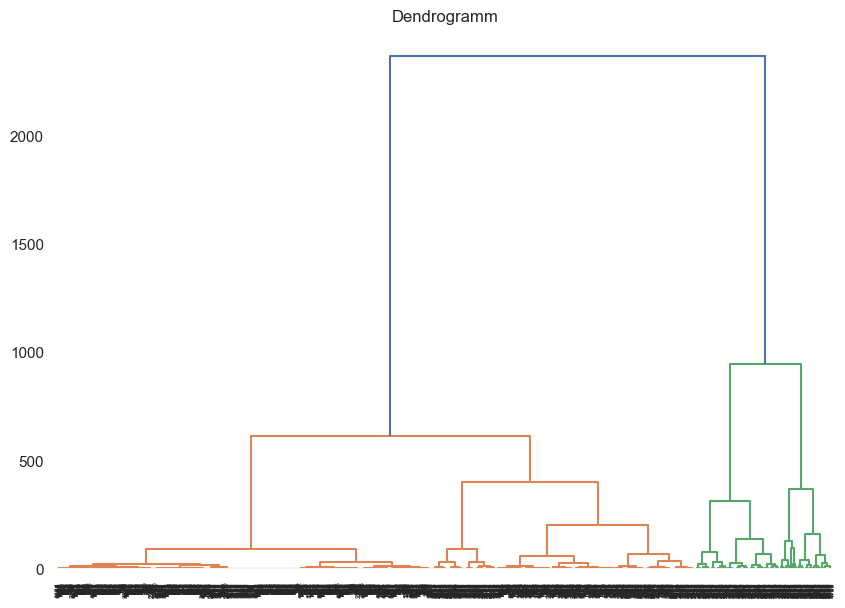

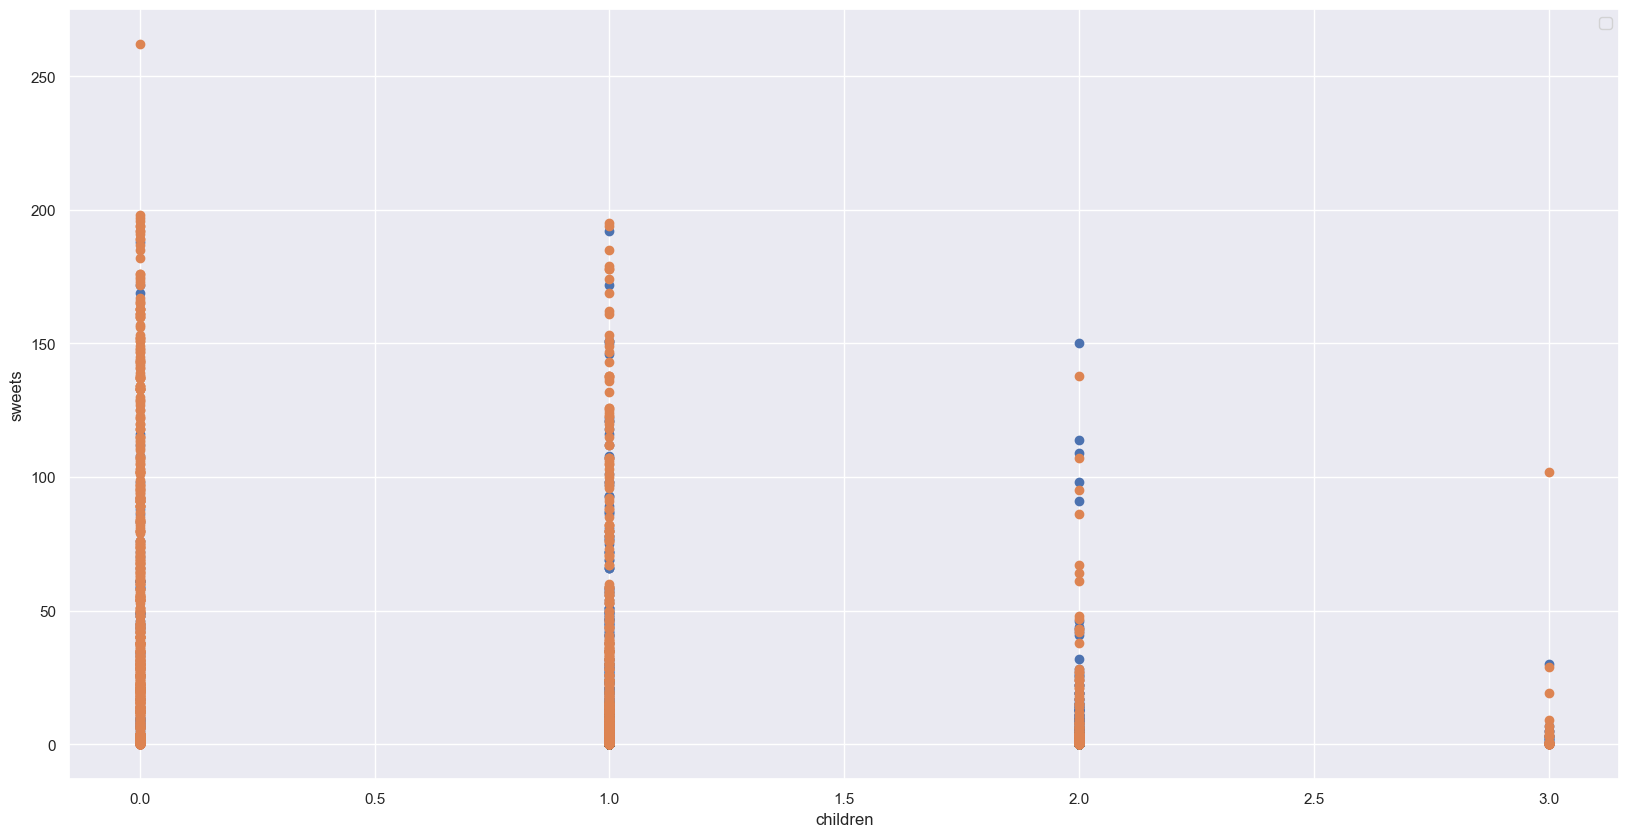

In [20]:
# Kinder, Süsßgkeiten, 
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.scatter(df1.children[df1.label == 0], df1["MntSweetProducts"][df1.label==0])
ax.scatter(df1.children[df1.label != 0], df1["MntSweetProducts"][df1.label!=0])

plt.xlabel("children")
plt.ylabel("sweets")
plt.legend()
plt.show()

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
No handles with labels found to put in legend.


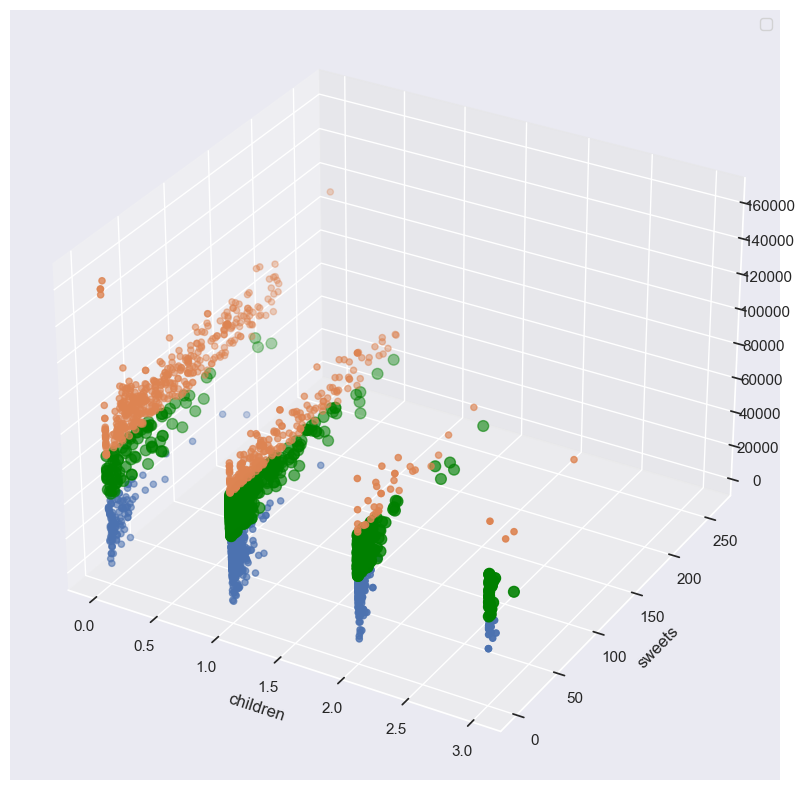

In [21]:
# Kinder, Süsßgkeiten, Einkommen
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.children[df1.label == 0], df1["MntSweetProducts"][df1.label==0],df1["Income"][df1.label == 0])
ax.scatter(df1.children[df1.label == 1], df1["MntSweetProducts"][df1.label==1],df1["Income"][df1.label ==1])
ax.scatter(df1.children[df1.label == 2], df1["MntSweetProducts"][df1.label == 2], df1["Income"][df1.label == 2], c='green', s=60)
plt.xlabel("children")
plt.ylabel("sweets")
plt.legend()
plt.show()

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
No handles with labels found to put in legend.


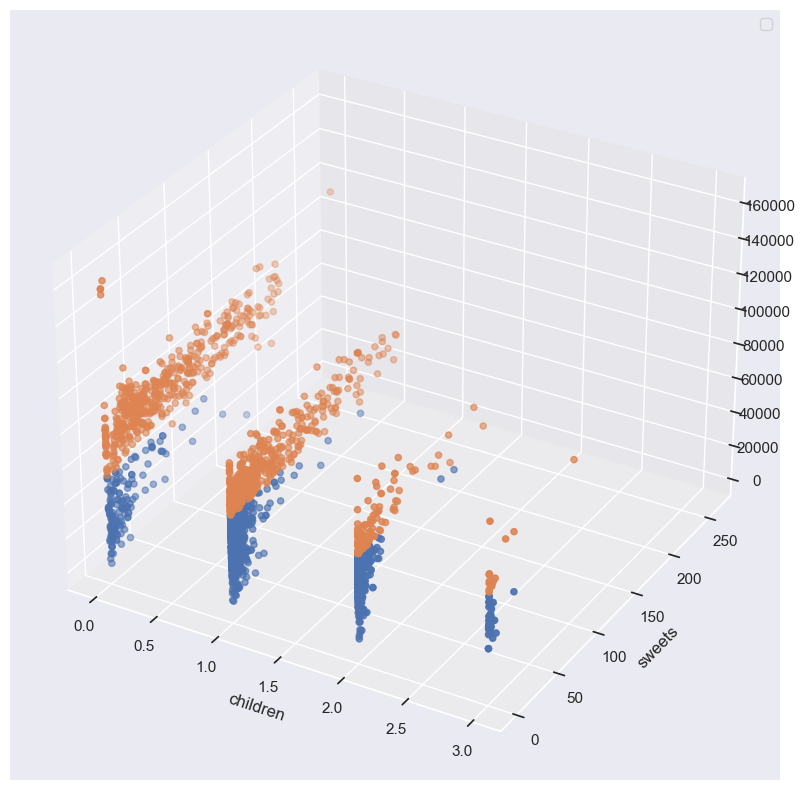

In [22]:
# Kinder, Süsßgkeiten, Einkommen
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.children[df1.label == 0], df1["MntSweetProducts"][df1.label==0],df1["Income"][df1.label == 0])
ax.scatter(df1.children[df1.label == 1], df1["MntSweetProducts"][df1.label==1],df1["Income"][df1.label ==1])
plt.xlabel("children")
plt.ylabel("sweets")
plt.legend()
plt.show()

### Frage 2: Kaufen Kunden mit höhrem Einkommen mehr Fisch/Fleisch?

In [23]:
# Korrelationsmatrix
corr=df1[['Year_Birth','Income','MntMeatProducts','MntFishProducts']].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,Year_Birth,Income,MntMeatProducts,MntFishProducts
Year_Birth,1.000000,-0.198000,-0.033000,-0.040000
Income,-0.198000,1.000000,0.692000,0.520000
MntMeatProducts,-0.033000,0.692000,1.000000,0.574000
MntFishProducts,-0.040000,0.520000,0.574000,1.000000


In [24]:
#Dendrogram
Y=df1[['Income','MntMeatProducts','MntFishProducts']]
plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(Y, method='ward'))

#=> 3 Cluster

No handles with labels found to put in legend.


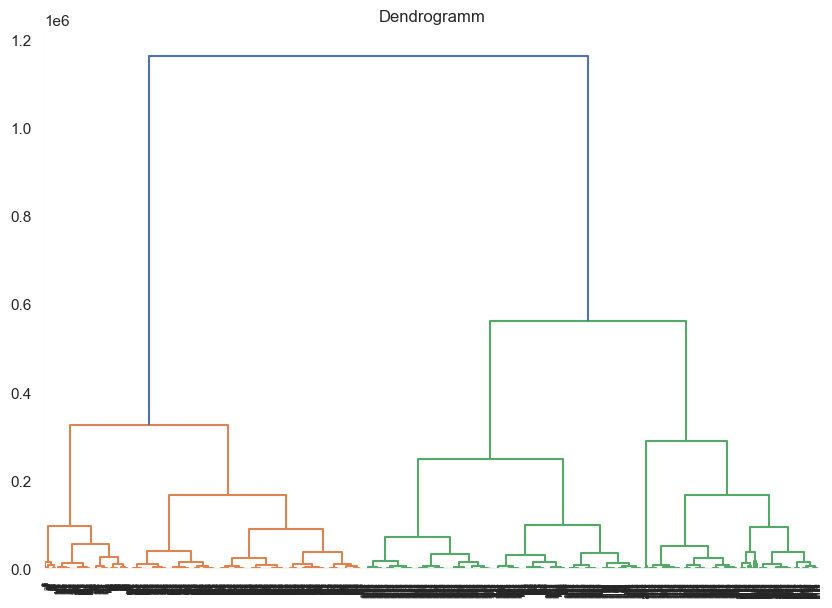

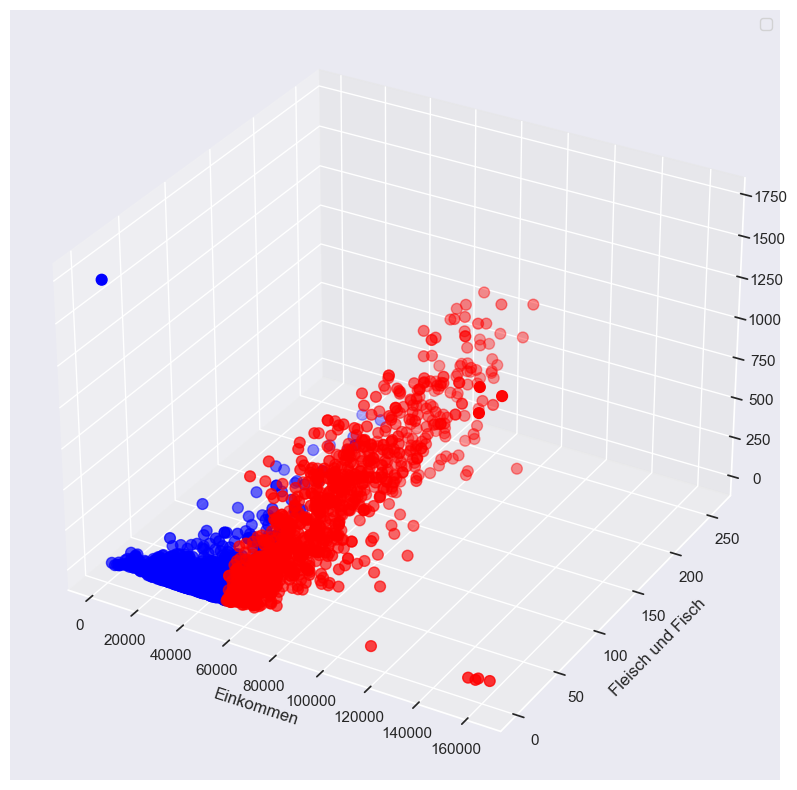

In [25]:
df1['FleischFisch']=df1.MntFishProducts + df1.MntMeatProducts

#Einkommen, Fleisch, Fisch, Kinder
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Income[df1.label == 0], df1["MntFishProducts"][df1.label == 0], df1["MntMeatProducts"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Income[df1.label != 0], df1["MntFishProducts"][df1.label != 0], df1["MntMeatProducts"][df1.label != 0], c='red', s=60)

plt.xlabel("Einkommen")
plt.ylabel("Fleisch und Fisch")
plt.legend()
plt.show()

No handles with labels found to put in legend.


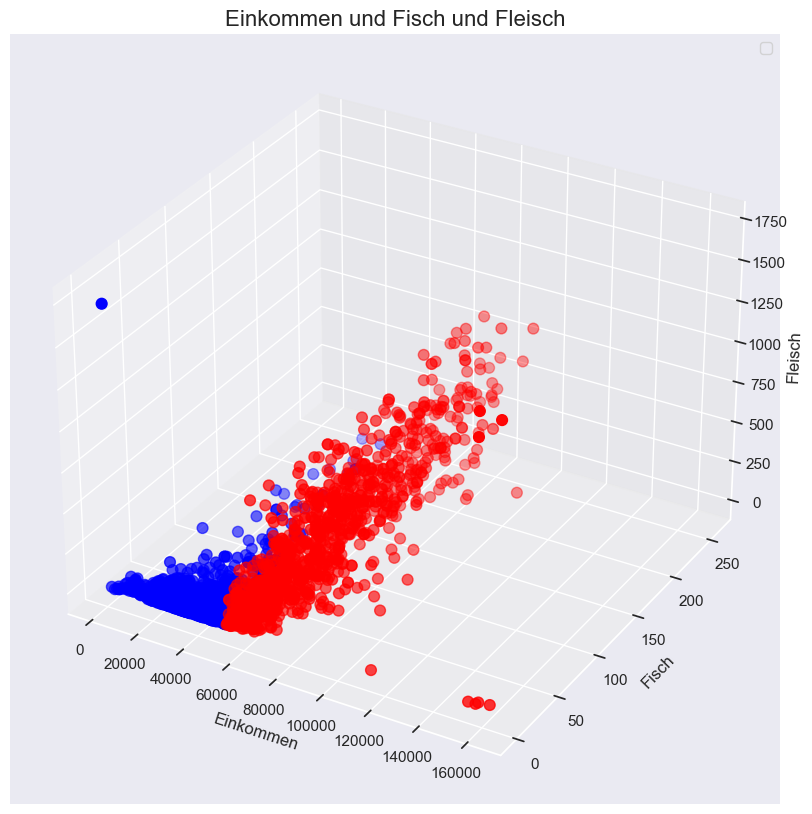

In [26]:
df1['FleischFisch']=df1.MntFishProducts + df1.MntMeatProducts

# Einkommen, Fleisch, Fisch, Kinder
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Income[df1.label == 0], df1["MntFishProducts"][df1.label == 0], df1["MntMeatProducts"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Income[df1.label != 0], df1["MntFishProducts"][df1.label != 0], df1["MntMeatProducts"][df1.label != 0], c='red', s=60)

plt.xlabel("Einkommen", size=12)
plt.ylabel("Fisch",size=12)
plt.title("Einkommen und Fisch und Fleisch", size=16)
plt.legend()
ax.set_zlabel('Fleisch', size=12)
plt.show()

No handles with labels found to put in legend.


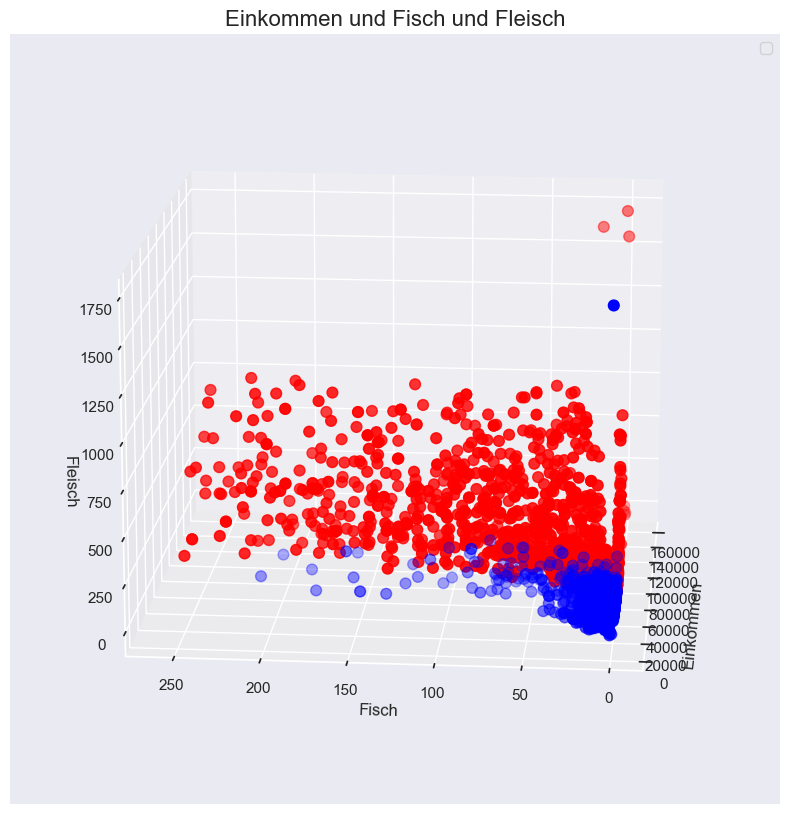

In [27]:
df1['FleischFisch']=df1.MntFishProducts + df1.MntMeatProducts

# Einkommen, Fleisch, Fisch, Kinder
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Income[df1.label == 0], df1["MntFishProducts"][df1.label == 0], df1["MntMeatProducts"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Income[df1.label ==1], df1["MntFishProducts"][df1.label ==1], df1["MntMeatProducts"][df1.label ==1], c='red', s=60)

ax.view_init(15, 185)
plt.xlabel("Einkommen", size=12)
plt.ylabel("Fisch",size=12)
plt.title("Einkommen und Fisch und Fleisch", size=16)
plt.legend()
ax.set_zlabel('Fleisch', size=12)
plt.show()

No handles with labels found to put in legend.


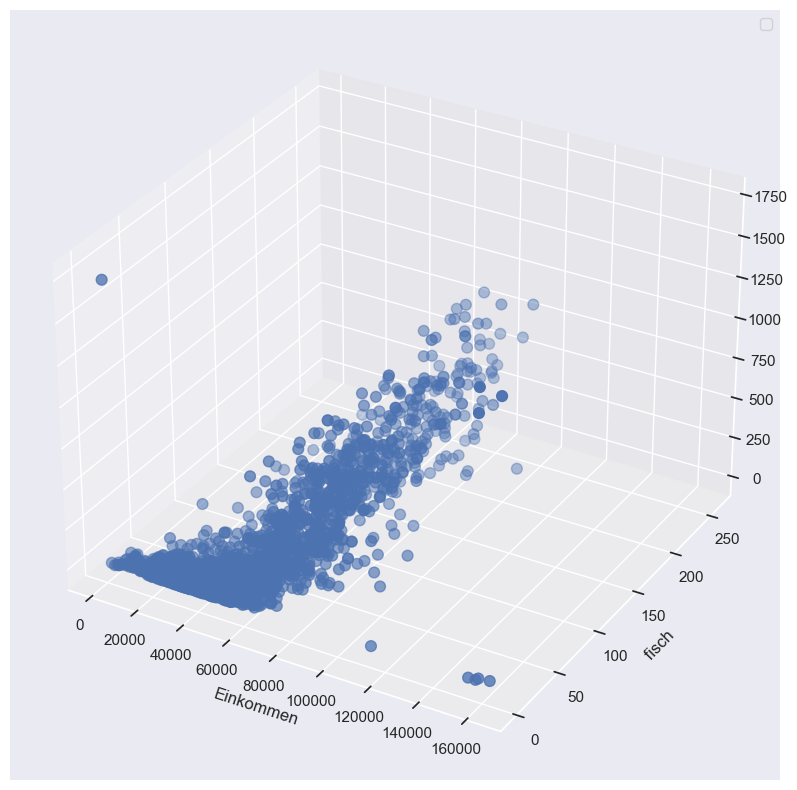

In [28]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Income, df1["MntFishProducts"], df1["MntMeatProducts"], s=60)
plt.xlabel("Einkommen")
plt.ylabel(" fisch")
plt.legend()
plt.show()

### Frage 3: Kaufen Kunden mit höherem Bildungsgrad mehr Wein?

In [29]:
# Korrelationsmatrix
corr=df1[['Education','MntWines']].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,MntWines
MntWines,1.000000


In [30]:
# Dendrogram
Y=df1[['Education','MntWines']]
plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(Y, method='ward'))

#=> 3 Cluster

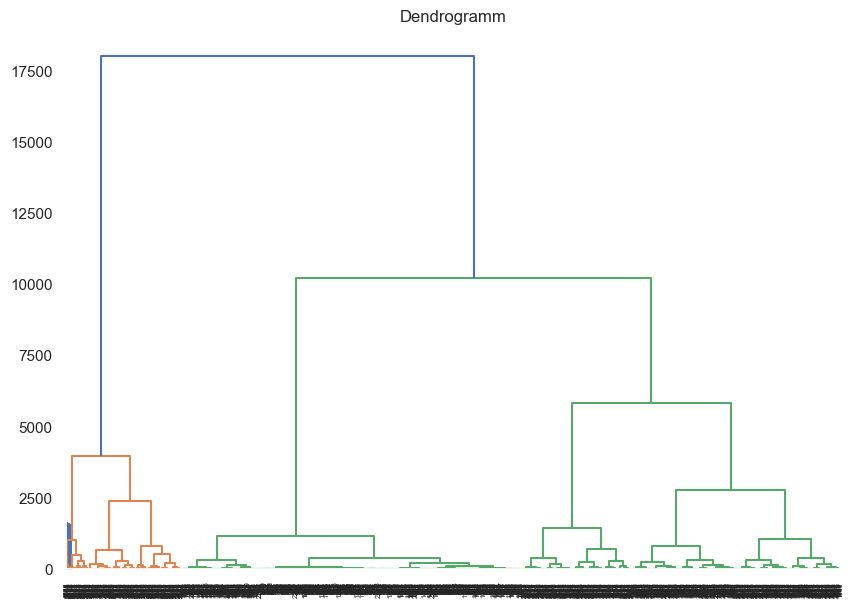

In [31]:
x = df1.Education
y= df1.MntWines
plt.scatter(x,y)
plt.show()

No handles with labels found to put in legend.


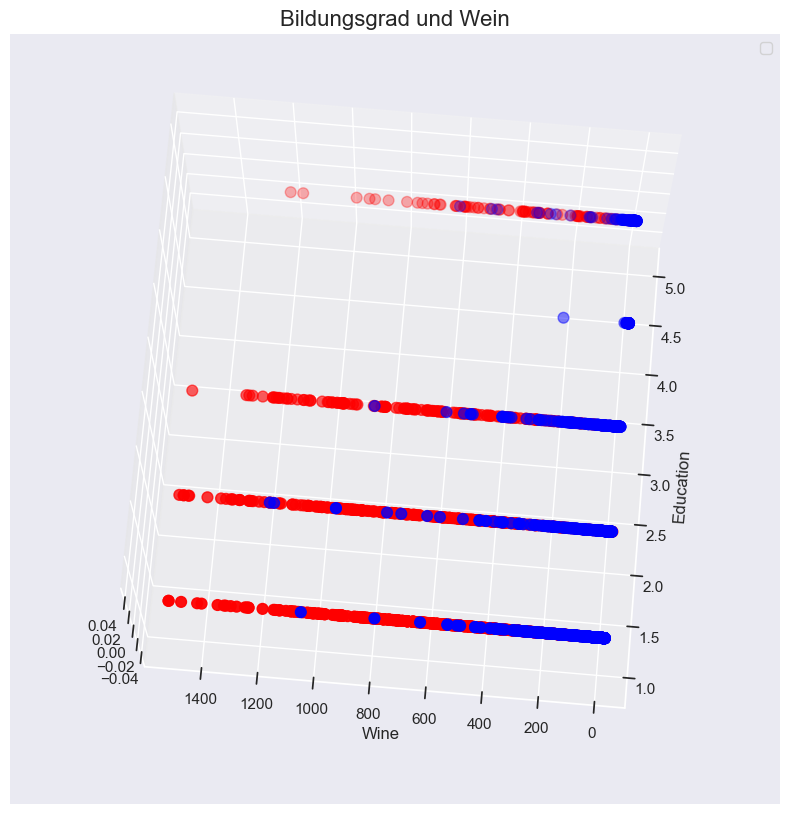

In [32]:
# Bildung und Wein
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Education[df1.label == 0], df1["MntWines"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Education[df1.label ==1], df1["MntWines"][df1.label ==1],  c='red', s=60)

ax.view_init(75, 185)
plt.xlabel("Education", size=12)
plt.ylabel("Wine",size=12)
plt.title("Bildungsgrad und Wein", size=16)
plt.legend()
plt.show()

### Frage 4: Präferieren Kunden bestimmte Werbekanäle?

In [33]:
# Korrelationsmatrix
corr=df1[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Menge', 'Income', 'Education']].corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Menge,Income
NumWebPurchases,1.000000,0.387000,0.516000,0.529000,0.459000
NumCatalogPurchases,0.387000,1.000000,0.518000,0.780000,0.697000
NumStorePurchases,0.516000,0.518000,1.000000,0.675000,0.630000
Menge,0.529000,0.780000,0.675000,1.000000,0.793000
Income,0.459000,0.697000,0.630000,0.793000,1.000000


In [34]:
# Dendrogram
Y=df1[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Menge', 'Income', 'Education']]
plt.figure(figsize=(10, 7))
plt.title("Dendrogramm")
dend = shc.dendrogram(shc.linkage(Y, method='ward'))

#=> 3 Cluster

No handles with labels found to put in legend.


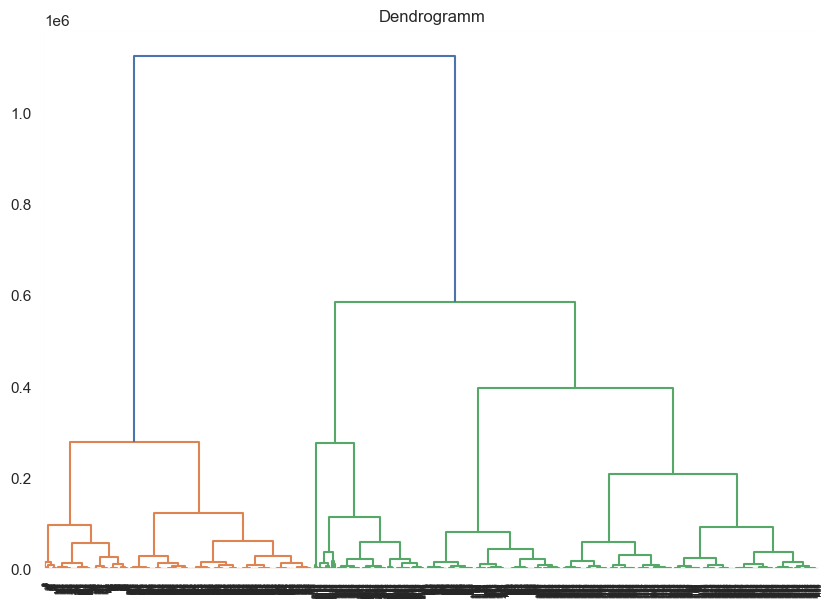

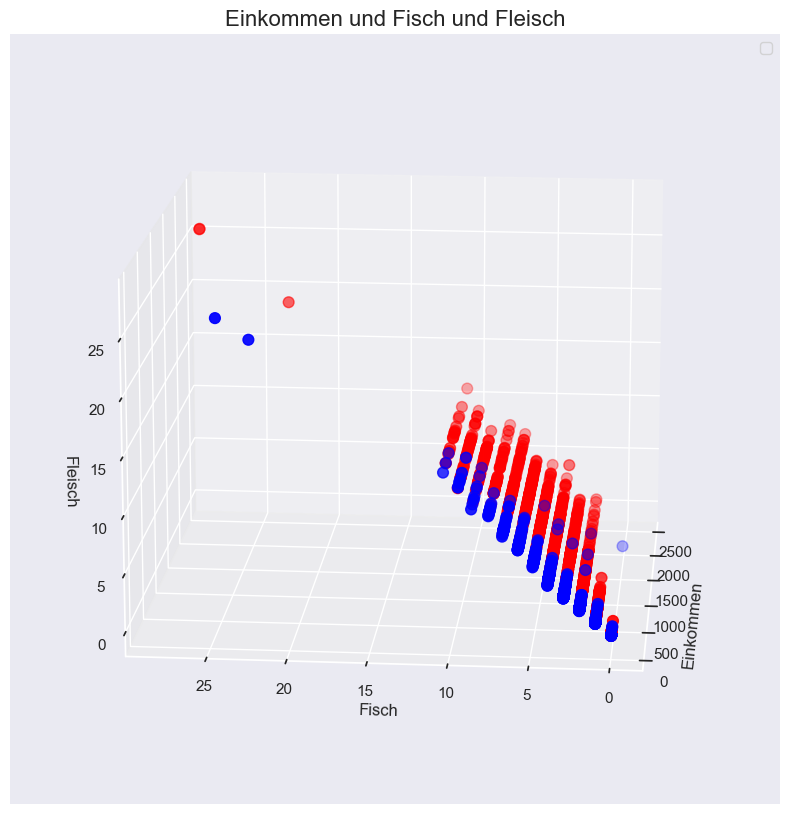

In [35]:
#Einkommen, Fleisch, Fisch, Kinder
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Menge[df1.label == 0], df1["NumWebPurchases"][df1.label == 0], df1["NumWebPurchases"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Menge[df1.label ==1], df1["NumCatalogPurchases"][df1.label ==1], df1["NumCatalogPurchases"][df1.label ==1], c='red', s=60)

ax.view_init(15, 185)
plt.xlabel("Einkommen", size=12)
plt.ylabel("Fisch",size=12)
plt.title("Einkommen und Fisch und Fleisch", size=16)
plt.legend()
ax.set_zlabel('Fleisch', size=12)
plt.show()

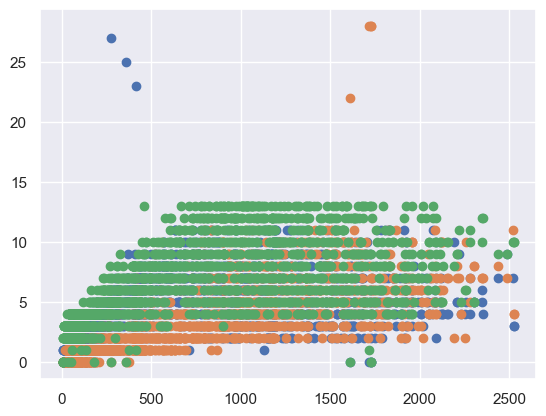

In [36]:
plt.scatter(df1['Menge'], df1['NumWebPurchases'])
plt.scatter(df1['Menge'], df1['NumCatalogPurchases'])
plt.scatter(df1['Menge'], df1['NumStorePurchases'])

plt.show()

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


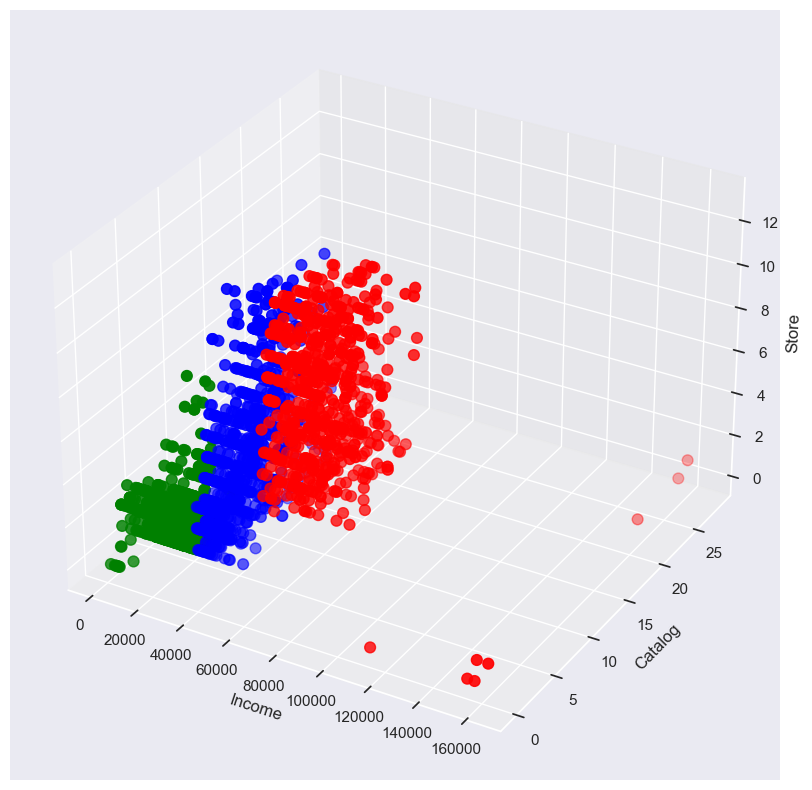

In [37]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Income[df1.label == 0], df1["NumCatalogPurchases"][df1.label == 0], df1["NumStorePurchases"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Income[df1.label == 1], df1["NumCatalogPurchases"][df1.label == 1], df1["NumStorePurchases"][df1.label == 1], c='red', s=60)
ax.scatter(df1.Income[df1.label == 2], df1["NumCatalogPurchases"][df1.label == 2], df1["NumStorePurchases"][df1.label == 2], c='green', s=60)

plt.xlabel("Income")
plt.ylabel("Catalog")
ax.set_zlabel('Store')
plt.show()

c:\Users\PFUETJ01\Anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


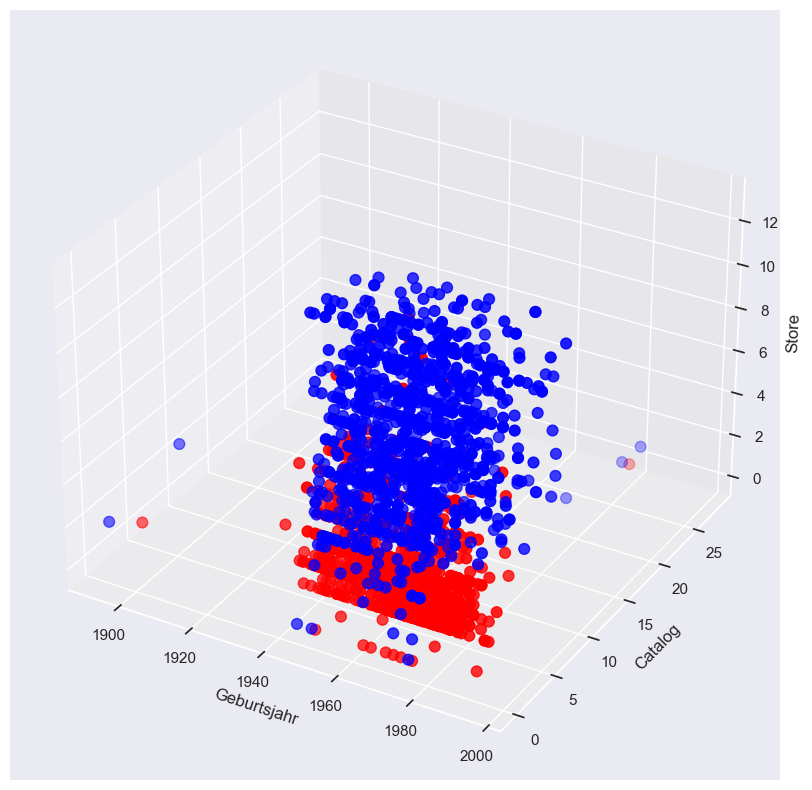

In [38]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(df1.iloc[:,1:])
df1["label"] = clusters
  
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df1.Year_Birth[df1.label == 0], df1["NumCatalogPurchases"][df1.label == 0], df1["NumStorePurchases"][df1.label == 0], c='blue', s=60)
ax.scatter(df1.Year_Birth[df1.label == 1], df1["NumCatalogPurchases"][df1.label == 1], df1["NumStorePurchases"][df1.label == 1], c='red', s=60)

plt.xlabel("Geburtsjahr")
plt.ylabel("Catalog")
ax.set_zlabel('Store')
plt.show()